In [1]:
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
# Install PyTorch
!pip install -U torch==1.8.1+cu101 torchvision==0.9.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.7 MB 9.9 kB/s 
     |████████████████████████████████| 17.3 MB 6.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.1+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.1+cu101 which is incompatible.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/inde

In [2]:
!rm -rf tcc
!git clone https://github.com/matheussn/tcc.git
%cd tcc
!git checkout segmentation

Cloning into 'tcc'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 255 (delta 122), reused 191 (delta 61), pack-reused 0
Receiving objects: 100% (255/255), 22.19 MiB | 32.93 MiB/s, done.
Resolving deltas: 100% (122/122), done.
/content/tcc
Branch 'segmentation' set up to track remote branch 'segmentation' from 'origin'.
Switched to a new branch 'segmentation'


In [3]:
!rm -rf mmgeneration
!git clone https://github.com/open-mmlab/mmgeneration.git
%cd mmgeneration

Cloning into 'mmgeneration'...
remote: Enumerating objects: 3253, done.
remote: Counting objects: 100% (1518/1518), done.
remote: Compressing objects: 100% (624/624), done.
remote: Total 3253 (delta 1169), reused 948 (delta 891), pack-reused 1735
Receiving objects: 100% (3253/3253), 2.13 MiB | 13.98 MiB/s, done.
Resolving deltas: 100% (2168/2168), done.
/content/tcc/mmgeneration


In [4]:
!pip install -r requirements.txt
!MMCV_WITH_OPS=1 pip install -v -e . 

     |████████████████████████████████| 376 kB 5.4 MB/s 
     |████████████████████████████████| 64 kB 103 kB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 69 kB 7.1 MB/s 
     |████████████████████████████████| 42 kB 947 kB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 4.2.0 which is incompatible.
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://git

In [5]:
!pip install ipywidgets

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
!mkdir data

In [33]:
!unzip ../generationV3.zip

Archive:  ../generationV3.zip
   creating: dysplasia/
   creating: dysplasia/severe/
  inflating: dysplasia/severe/image087-roi6.jpg  
  inflating: dysplasia/severe/image087-roi5.jpg  
  inflating: dysplasia/severe/image087-roi4.jpg  
  inflating: dysplasia/severe/image087-roi3.jpg  
  inflating: dysplasia/severe/image087-roi2.jpg  
  inflating: dysplasia/severe/image087-roi1.jpg  
  inflating: dysplasia/severe/image086-roi6.jpg  
  inflating: dysplasia/severe/image086-roi5.jpg  
  inflating: dysplasia/severe/image086-roi4.jpg  
  inflating: dysplasia/severe/image086-roi3.jpg  
  inflating: dysplasia/severe/image086-roi2.jpg  
  inflating: dysplasia/severe/image086-roi1.jpg  
  inflating: dysplasia/severe/image082-roi4.jpg  
  inflating: dysplasia/severe/image082-roi3.jpg  
  inflating: dysplasia/severe/image082-roi2.jpg  
  inflating: dysplasia/severe/image082-roi1.jpg  
  inflating: dysplasia/severe/image078-roi5.jpg  
  inflating: dysplasia/severe/image078-roi4.jpg  
  inflating: dy

In [34]:
!cp dysplasia/ ./data/ -r

In [10]:
# !cp ./data/dysplasia/dcgan.py ./configs/dcgan/
# !cp ../tcc/biggan.py ./configs/biggan/

In [27]:
import mmcv
from mmcv import Config
from mmgen.apis import init_model, sample_conditional_model

# Specify the path to model config and checkpoint file
config_file = '../biggan.py'
# you can download this checkpoint in advance and use a local file path.
# checkpoint_file = 'https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth'
# Specify the path to image you want to translate
image_path = 'data/dysplasia'
device = 'cpu'
# init a generatvie
# cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')
cfg = Config.fromfile(config_file)
model = init_model(config_file, device=device)
# translate a single image
translated_image = sample_conditional_model(model, 16)

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/conv_module.py:151: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')


In [28]:
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='BasiccGAN',
    generator=dict(
        type='BigGANGenerator',
        output_scale=128,
        noise_size=120,
        num_classes=1000,
        base_channels=96,
        shared_dim=128,
        with_shared_embedding=True,
        sn_eps=1e-06,
        init_type='ortho',
        act_cfg=dict(type='ReLU', inplace=True),
        split_noise=True,
        auto_sync_bn=False),
    discriminator=dict(
        type='BigGANDiscriminator',
        input_scale=128,
        num_classes=1000,
        base_channels=96,
        sn_eps=1e-06,
        init_type='ortho',
        act_cfg=dict(type='ReLU', inplace=True),
        with_spectral_norm=True),
    gan_loss=dict(type='GANLoss', gan_type='hinge'))
train_cfg = dict(
    disc_steps=8, gen_steps=1, batch_accumulation_steps=8, use_ema=True)
test_cfg = None
optimizer = dict(
    generator=dict(type='Adam', lr=0.0001, betas=(0.0, 0.999), eps=1e-06),
    discriminator=dict(type='Adam', lr=0.0004, betas=(0.0, 0.999), 

In [29]:
translated_image = (translated_image[:, [2, 1, 0]] + 1.) / 2.

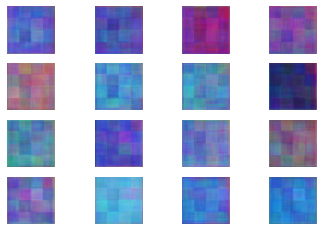

In [30]:
fig, axs = plt.subplots(4, 4)
cnt = 0
for i in range(4):
    for j in range(4):
        img = translated_image[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1

In [31]:
from mmgen.apis import train_model
from mmgen.datasets import build_dataset

In [35]:
datasets = [build_dataset(cfg.data['train'])]

In [ ]:
train_model(model, datasets, cfg)

In [ ]:
gen_imgs = sample_conditional_model(model, 4)

In [ ]:
gen_imgs = (gen_imgs[:, [2, 1, 0]] + 1.) / 2.

In [ ]:
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        img = gen_imgs[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1

In [ ]:
gen_imgs = sample_conditional_model(model, 4)
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        img = gen_imgs[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1

In [ ]:
from torchvision import utils
import os
mmcv.mkdir_or_exist(os.path.dirname('./work_dirs/demos/conditional_samples.png'))

In [ ]:
gen_imgs = sample_conditional_model(model, 4)
gen_imgs = (gen_imgs[:, [2, 1, 0]] + 1.) / 2.
utils.save_image(gen_imgs, './work_dirs/demos/conditional_samples.png', nrow=6, padding=1)

In [ ]:
gen_imgs = sample_conditional_model(model, 4, label=5)
gen_imgs = (gen_imgs[:, [2, 1, 0]] + 1.) / 2.
fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        img = gen_imgs[cnt].permute(1, 2, 0)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        cnt += 1